<a href="https://colab.research.google.com/github/JSJeong-me/Uniinfo-Machine-Vision/blob/main/QRCode/QRdetect01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install zbar-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 543 kB 4.1 MB/s 
  Created wheel for zbar-py: filename=zbar_py-1.0.4-cp37-cp37m-linux_x86_64.whl size=201296 sha256=0ff860396377329a3669174f077b5d0a7a4d9c80bb10c889baae539421bfc43c
  Stored in directory: /root/.cache/pip/wheels/87/19/bc/ae6963a059ba9263ed246bb6aac6328affc4936b81d9fd62a6
Successfully built zbar-py


In [2]:
# !pip install  opencv-python-headless

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# -*- coding: utf-8 -*- 
 
import cv2
import numpy as np

In [4]:
inputImage = cv2.imread("qrcode.png")


In [13]:
inputImage_interpol = cv2.resize(inputImage, None, fx=1, fy=1, interpolation=cv2.INTER_AREA)

In [5]:
inputImage.shape

(200, 200, 3)

In [6]:
qrDecoder = cv2.QRCodeDetector()

In [7]:
type(qrDecoder)

cv2.QRCodeDetector

In [8]:
# QR코드를 찾고 디코드해줍니다
data,bbox,rectifiedImage = qrDecoder.detectAndDecode(inputImage)
if len(data)>0:
    print("Decoded Data : {}".format(data))
    rectifiedImage = np.uint8(rectifiedImage)
 
else:
    print("QR Code not detected")

Decoded Data : https://www.jj.ac.kr/_custom/jj/_common/board/download.jsp?attach_no=185225


In [9]:
from google.colab.patches import cv2_imshow

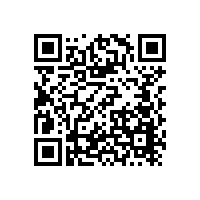

In [10]:
cv2_imshow(inputImage)

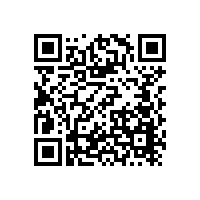

In [14]:
cv2_imshow(inputImage_interpol)

In [ ]:
# -*- coding: utf-8 -*- 
 
import zbar
import cv2
 
file_path = "qrcode2.png"
 
# Zbar 라이브러리로 QR코드를 인식하기위해서 opcnCV로 이미지를 그레이 스케일로 읽어옵니다
im = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
 
 
qrcode_data = ""
 
#Zbar는 다중 QR 검출도 가능합니다
#인식된 QR 데이터들을 가져옵니다
scanner = zbar.Scanner()
results = scanner.scan(im)
for result in results:
    qrcode_data = result.data
 
# QR 코드가 인식이 되지 않았다면
# QR Code not detected
if(qrcode_data=="null"):
    print("QR Code not detected")
else:
    # QR 코드가 인식이 되었다면
    # 인식된 QR 코드의 데이터를 출력해준다
   print("Decoded Data : {}".format(qrcode_data))